## Observations and Insights 

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from matplotlib.pyplot import figure
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined = pd.merge(mouse_metadata, study_results, how = 'outer')
# Display the data table for preview
combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [30]:
# Checking the number of mice.
total_mice = combined['Mouse ID'].value_counts()
num_of_mice = len(total_mice)
print(f"The Total Number of Mice: {num_of_mice}")

The Total Number of Mice: 249


In [31]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = combined.loc[combined.duplicated(subset = ['Mouse ID','Timepoint']),'Mouse ID'].unique()


In [32]:
# Optional: Get all the data for the duplicate mouse ID. 



In [33]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined[combined['Mouse ID'].isin(duplicates)==False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [34]:
# Checking the number of mice in the clean DataFrame.
total_clean = clean_df['Mouse ID'].value_counts()
num_of_clean = len(total_clean)
print(f"The Total Number of Mice in Clean DataFrame: {num_of_clean}")

The Total Number of Mice in Clean DataFrame: 248


## Summary Statistics

In [35]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
reg_mean = clean_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
reg_mean

reg_median = clean_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
reg_median

reg_vari = clean_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
reg_vari

reg_std = clean_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
reg_std

reg_sem = clean_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
reg_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [36]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
group_by = clean_df.groupby('Drug Regimen')
sum_stat_table = group_by.agg(['mean','median','var','std','sem'])['Tumor Volume (mm3)']
sum_stat_table

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

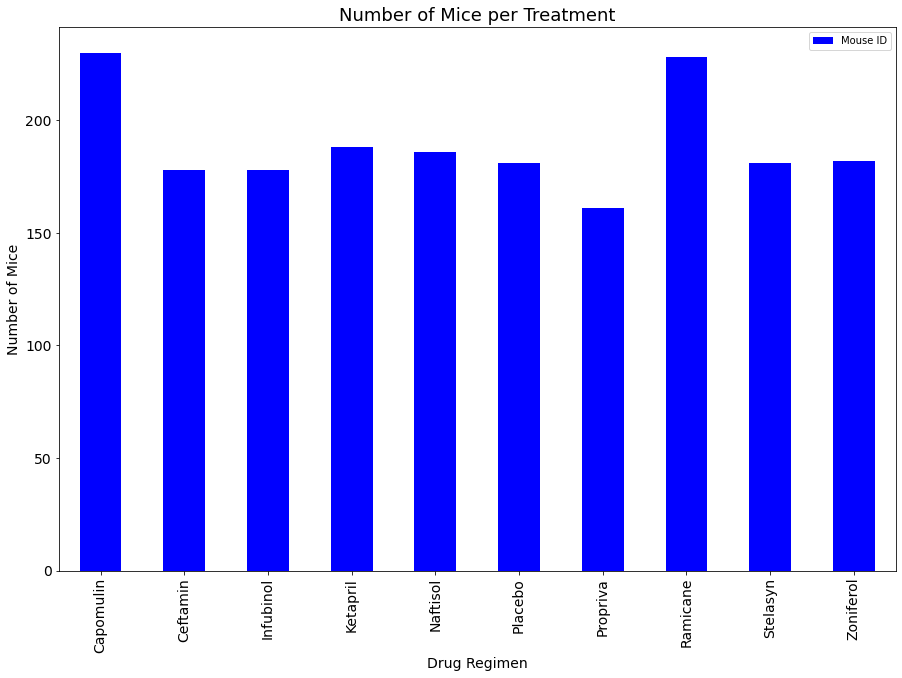

In [37]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_treat = combined.groupby(['Drug Regimen']).count()['Mouse ID']
plot = mice_treat.plot.bar(figsize=(15,10), color = 'Blue', fontsize = 14)
plt.xlabel('Drug Regimen', fontsize = 14)
plt.ylabel('Number of Mice', fontsize = 14)
plt.title('Number of Mice per Treatment', fontsize = 18)
plt.legend(loc='best')
plt.show()

In [38]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.



In [41]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_group = combined.groupby(['Mouse ID', 'Sex'])
gender_df = pd.DataFrame(gender_group.size())

mouse_genders = pd.DataFrame(gender_df.groupby(['Sex']).count())
mouse_genders.columns = ['Total Count']

mouse_genders['Percentage'] = (100*(mouse_genders['Total Count']/mouse_genders['Total Count'].sum()))

In [42]:
mouse_genders.head()

,Total Count,Percentage
Sex,,
Female,124,49.799197
Male,125,50.200803


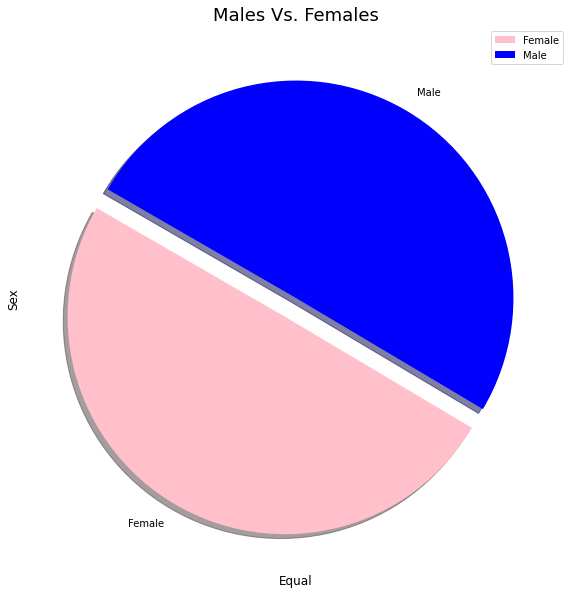

In [44]:
colors = ['pink','blue']
explode = (0.1,0)
plot = mouse_genders.plot.pie(y='Total Count', figsize = (15,10), colors = colors, startangle = 150, explode = explode, shadow = True)
plt.title("Males Vs. Females", fontsize = 18)
plt.ylabel('Sex', fontsize = 12)
plt.xlabel('Equal', fontsize = 12)
plt.show()

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
